In [55]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt

In [57]:
model = joblib.load("data/demand_model.pkl")
df = pd.read_csv("data/cleaned_sales_data.csv")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [59]:
avg_discount = df['discount'].mean()
avg_comp_price = df['competitor_price'].mean()
avg_month = df['month'].mode()[0]

In [61]:
prices = np.arange(df['price'].min(), df['price'].max(), 1)

results = []

base_price = df['price'].mean()
base_demand = df['units_sold'].mean()

In [63]:
for price in prices:
    
    # Elasticity changes with price
    if price < base_price:
        elasticity = -0.6   # inelastic region
    else:
        elasticity = -1.8   # elastic region
    
    demand = base_demand * (price / base_price) ** elasticity
    revenue = price * demand
    
    results.append((price, demand, revenue))

In [65]:
results_df = pd.DataFrame(results, columns=["Price", "Predicted_Demand", "Revenue"])

In [67]:
best = results_df.loc[results_df['Revenue'].idxmax()]
print("Optimal Price:", round(best['Price'],2))
print("Predicted Demand:", round(best['Predicted_Demand'],2))
print("Maximum Revenue:", round(best['Revenue'],2))

Optimal Price: 303.0
Predicted Demand: 3.0
Maximum Revenue: 908.92


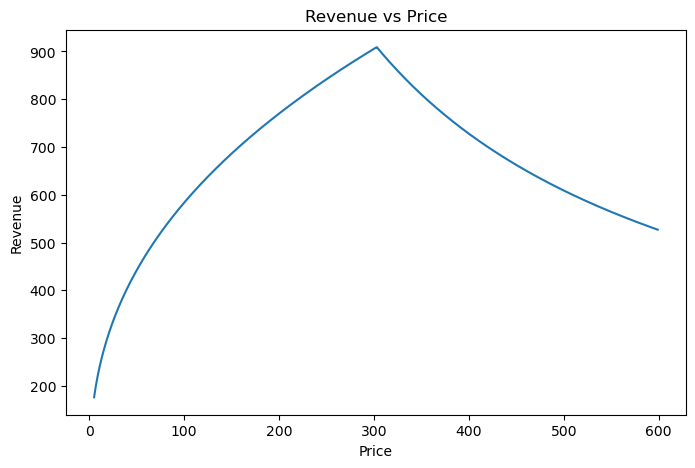

In [69]:
plt.figure(figsize=(8,5))
plt.plot(results_df["Price"], results_df["Revenue"])
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Revenue vs Price")
plt.show()

In [71]:
df.to_csv("data/cleaned_sales_data.csv", index=False)

results_df.to_csv("data/pricing_simulation_results.csv", index=False)